### ** Difference Between Simple And Multiple Linear Regression

- Simple linear regression has only one x and one y variable.
- Multiple linear regression has one y and two or more x variables.
- For instance, when we predict rent based on square feet alone that is simple linear regression.
- When we predict rent based on square feet and age of the building that is an example of multiple linear regression.

### An extension of simple linear regression
In simple linear regression there is a one-to-one relationship between the input variable and the output variable. 
But in multiple linear regression, as the name implies there is a many-to-one relationship, instead of just using one input variable, you use several.

### Multiple Linear Regression

Till now, we have created the model based on only one feature. Now, we’ll include multiple features and create a model to see the relationship between those features and the label column.
This is called **Multiple Linear Regression**.

y = b0 + b1x1+ b2x2... + bnxn

 What do terms represent?
- y is the response or the target variable
- x1,x2,x3...xn  are the feature as it is multiple
- b1,b2...bn are the coefficient of x1,x2,..xn respectively
- b0 is the intercept

Each $x$ represents a different feature, and each feature has its own coefficient

## Implementation

### Step1: Import data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
dataset = pd.read_csv('data/50_Startups.csv')

In [3]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


- See here more than one feature so it is multiplt linear regression
- Here Profit is our Target Feature

In [4]:
dataset.shape

(50, 5)

### Step2: Visuallize The Data

In [5]:
#sns.pairplot(dataset)

In [6]:
dataset = dataset.drop('State',axis=True)

- Here i simply drop the State feature.
- in next some days i will show how to deal with categorical feature.

In [7]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


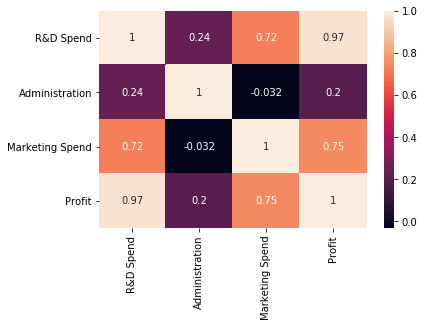

In [8]:
corr = dataset.corr()
sns.heatmap(corr,annot=True)

## Evaluate The Model

## Scalling The Data

In [9]:
X = dataset.drop('Profit',axis=True)
y = dataset['Profit']

In [10]:
X.head() #before standardized data

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

 - As here all data are in very big range so we need to take all the data in same range.
 - So here i use StandardScaler which take all data in same range
 - here it use z score to standardized data
 - Z- score formula
 
                                      Z = x-μ /σ

 
 
- Z	=	standard score
- x	=	observed value
- μ	=	mean of the sample
-  σ =	standard deviation of the sample

- Some Of the Algorithm Like Tree Base Algorithm not require scalling

In [12]:
X #after standardized/scalling data

array([[ 2.01641149e+00,  5.60752915e-01,  2.15394309e+00],
       [ 1.95586034e+00,  1.08280658e+00,  1.92360040e+00],
       [ 1.75436374e+00, -7.28257028e-01,  1.62652767e+00],
       [ 1.55478369e+00, -9.63646307e-02,  1.42221024e+00],
       [ 1.50493720e+00, -1.07991935e+00,  1.28152771e+00],
       [ 1.27980001e+00, -7.76239071e-01,  1.25421046e+00],
       [ 1.34006641e+00,  9.32147208e-01, -6.88149930e-01],
       [ 1.24505666e+00,  8.71980011e-01,  9.32185978e-01],
       [ 1.03036886e+00,  9.86952101e-01,  8.30886909e-01],
       [ 1.09181921e+00, -4.56640246e-01,  7.76107440e-01],
       [ 6.20398248e-01, -3.87599089e-01,  1.49807267e-01],
       [ 5.93085418e-01, -1.06553960e+00,  3.19833623e-01],
       [ 4.43259872e-01,  2.15449064e-01,  3.20617441e-01],
       [ 4.02077603e-01,  5.10178953e-01,  3.43956788e-01],
       [ 1.01718075e+00,  1.26919939e+00,  3.75742273e-01],
       [ 8.97913123e-01,  4.58678535e-02,  4.19218702e-01],
       [ 9.44411957e-02,  9.11841968e-03

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((40, 3), (10, 3), (40,), (10,))

## Build  Model

In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = regressor.predict(X_test).round(1)

In [17]:
calculation = pd.DataFrame(np.c_[y_test,y_pred], columns = ["Original Salary","Predict Salary"])
calculation.head(5)

,Original Salary,Predict Salary
0,103282.38,103901.9
1,144259.40,132763.1
2,146121.95,133567.9
3,77798.83,72911.8
4,191050.39,179627.9


In [18]:
print("Training Accuracy :", regressor.score(X_train, y_train))
print("Testing Accuracy :", regressor.score(X_test, y_test))

Training Accuracy : 0.9499572530324031
Testing Accuracy : 0.9393955917820571


In [19]:
regressor.intercept_

111297.71256204927

In [20]:
regressor.coef_

array([35391.2501208 ,   815.21987542,  4202.06618916])

### Test The Model

In [21]:
feature = [165349.20,136897.80,471784.10]
scale_feature = sc.transform([feature])
scale_feature

array([[2.01641149, 0.56075291, 2.15394309]])

In [22]:
y_pred_test = regressor.predict(scale_feature)
y_pred_test  #By Using Sklearn Library

array([192169.18440985])

In [23]:
# Here I use b1x1+b2x2+b3x3+b0 BY MANUAL
35391.2501208*2.01641149+815.21987542*0.56075291+4202.06618916*2.15394309+ 111297.71256204927

192169.1843003897

- Now above you see manual and automatic prediction on the same data in this way linear regression predict the data